# AWQI v/s EWQI

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set()
sns.set_palette('bright')

df = pd.read_csv('refined-data/eval_data.csv')
awqi = pd.read_csv('quality_estimate_and_wqi.csv')[['WQI','WQI_CLASSIF']]
ewqi = pd.read_csv('quality_estimate_and_entropy_wqi.csv')[['EWQI','EWQI_CLASSIF']]

wqi = pd.concat([df, awqi, ewqi], axis=1)

awqi, ewqi

(             WQI WQI_CLASSIF
 0     179.179174  Unsuitable
 1     503.168402  Unsuitable
 2      39.979871        Good
 3     623.628660  Unsuitable
 4      57.007405        Poor
 ...          ...         ...
 2759   17.533385   Excellent
 2760   74.851919        Poor
 2761   67.464524        Poor
 2762   69.255678        Poor
 2763   35.477952        Good
 
 [2764 rows x 2 columns],
              EWQI EWQI_CLASSIF
 0      307.655924   Unsuitable
 1     1274.533598   Unsuitable
 2       59.095708         Poor
 3      636.424848   Unsuitable
 4      151.448314   Unsuitable
 ...           ...          ...
 2759    55.241104         Poor
 2760   287.785086   Unsuitable
 2761   196.862044   Unsuitable
 2762   102.900091   Unsuitable
 2763   101.454366   Unsuitable
 
 [2764 rows x 2 columns])

In [143]:
import numpy as np
(wqi[['DISTRICT','LOCATION']].value_counts() >= 5).sum()

72

In [132]:
wqi[(wqi['DISTRICT']=='Valsad') & (wqi['LOCATION']=='Wankal')]['YEAR']

1624    2019
Name: YEAR, dtype: int64

In [22]:
wqi

,DISTRICT,LOCATION,PH,EC,TDS,TH,CA,MG,NA,K,...,NO3,SO4,F,ALK,YEAR,SAR,WQI,WQI_CLASSIF,EWQI,EWQI_CLASSIF
0,Ahmedabad,Barvala,8.25,5090.0,3410.0,450.0,80.0,60.0,937.0,0.3,...,24.00,346.0,2.80,730.0,2017,NaN,179.179174,Unsuitable,307.655924,Unsuitable
1,Ahmedabad,Dhandhuka1,8.23,14210.0,9521.0,1300.0,180.0,207.0,3220.0,9.9,...,1600.00,1290.0,6.64,830.0,2017,NaN,503.168402,Unsuitable,1274.533598,Unsuitable
2,Ahmedabad,Endla,8.17,685.0,459.0,220.0,52.0,22.0,49.0,13.6,...,2.00,2.0,0.44,250.0,2017,NaN,39.979871,Good,59.095708,Poor
3,Ahmedabad,Kumarkhan,8.19,10660.0,7142.0,800.0,140.0,109.0,1875.0,7.2,...,32.00,443.0,11.20,810.0,2017,NaN,623.628660,Unsuitable,636.424848,Unsuitable
4,Ahmedabad,Kundali,8.03,1300.0,871.0,280.0,64.0,29.0,210.0,3.7,...,230.00,171.0,0.50,250.0,2017,NaN,57.007405,Poor,151.448314,Unsuitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,Kutchch,Desalpur,7.42,768.0,515.0,180.0,40.0,19.0,95.0,10.0,...,3.20,70.0,0.15,150.0,2021,3.08,17.533385,Excellent,55.241104,Poor
2760,Kutchch,Ratanpar Khadir,7.73,4419.0,2961.0,701.0,96.0,112.0,712.0,17.0,...,13.00,310.0,0.78,330.0,2021,11.70,74.851919,Poor,287.785086,Unsuitable
2761,Kutchch,Rapar,7.60,2942.0,1971.0,400.0,132.0,17.0,552.0,26.0,...,33.00,538.0,0.93,230.0,2021,12.00,67.464524,Poor,196.862044,Unsuitable
2762,Kutchch,Kuda,7.35,1464.0,981.0,410.0,104.0,36.0,125.0,18.0,...,0.31,25.0,1.04,500.0,2021,2.68,69.255678,Poor,102.900091,Unsuitable


# Histplot

<Axes: ylabel='Count'>

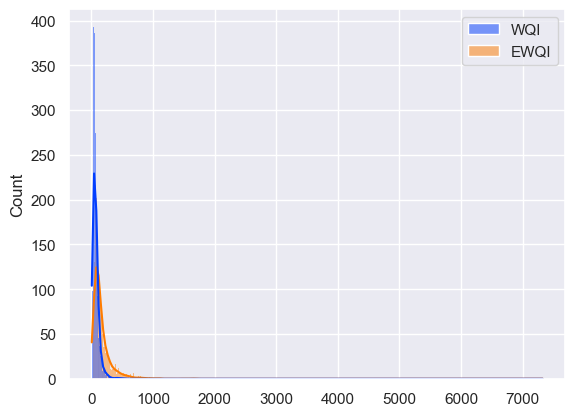

In [16]:
sns.histplot([awqi['WQI'], ewqi['EWQI']], kde=True)

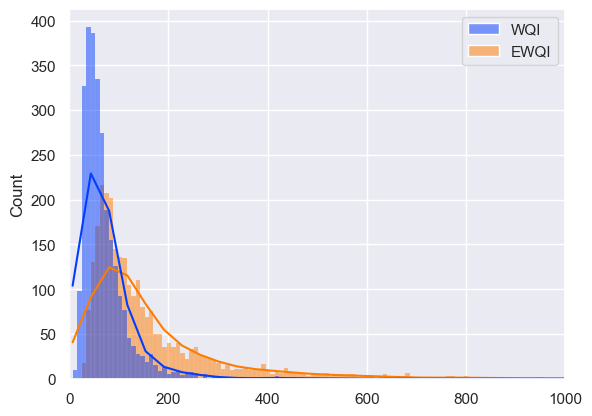

In [17]:
sns.histplot([awqi['WQI'], ewqi['EWQI']], kde=True)
plt.xlim(0, 1000)
plt.show()

# Correlation Analysis

<Axes: >

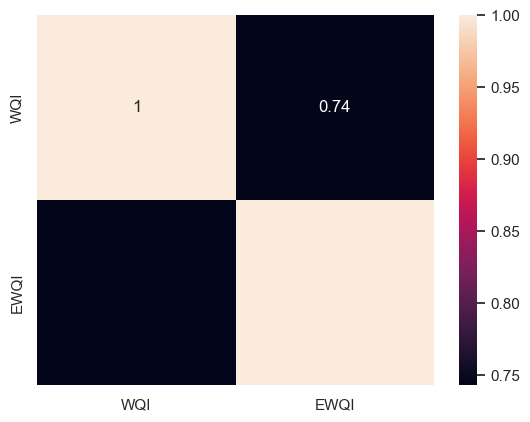

In [18]:
sns.heatmap(wqi[['WQI','EWQI']].corr(), annot=True)

# Regression Analysis

In [24]:
import pandas as pd
import statsmodels.api as sm

# Independent variables
X = wqi['WQI']
y = wqi['EWQI']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model= sm.OLS(y, X)

results= model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   EWQI   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3405.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:07:49   Log-Likelihood:                -17643.
No. Observations:                2764   AIC:                         3.529e+04
Df Residuals:                    2762   BIC:                         3.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.0694      3.053     28.519      0.0

# EWQI=87.0694+1.1032⋅WQI

# Comparison of Methods using Models

## 1. Regression

In [25]:
# import all other regression models available in different libraries
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge

# import metrics to evaluate the models
from sklearn.model_selection import cross_val_score, KFold

In [26]:
# create a dictionary for model names and model objects

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'K Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'Ada Boost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'Kernel Ridge': KernelRidge(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'LightGBM': LGBMRegressor(),
    'Multi Layer Perceptron': MLPRegressor()
}

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def correlation_coefficient(observed, predicted):
    return np.corrcoef(observed, predicted)[0, 1]

def root_mean_square_error(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

def nash_sutcliffe_efficiency(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum((observed - predicted) ** 2)
    denominator = np.sum((observed - mean_observed) ** 2)
    return 1 - (numerator / denominator)

def index_of_agreement(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum((observed - predicted) ** 2)
    denominator = np.sum((np.abs(predicted - mean_observed) +
                          np.abs(observed - mean_observed)) ** 2)
    return 1 - (numerator / denominator)

In [47]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = wqi.drop(['DISTRICT','LOCATION','WQI','EWQI','WQI_CLASSIF','EWQI_CLASSIF'], axis=1)
X = StandardScaler().fit_transform(X)

y1 = wqi['WQI']
y2 = wqi['EWQI']

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Create a dictionary to store results
results_dict = {'Model': [], 'Target': [], 'Metric': [], 'Metric Value': []}

# Metrics to calculate
metrics = {'MSE': mean_squared_error,
           'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
           'MAE': mean_absolute_error,
           'R2': r2_score,
           'NSE': lambda y_true, y_pred: 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))}

# Loop through models
for name, model in tqdm(models.items()):
    for target_name, target_train, target_test in [('y1', y1_train, y1_test), ('y2', y2_train, y2_test)]:
        for metric_name, metric_func in metrics.items():
            # Train the model
            model.fit(X_train, target_train)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Calculate the metric value
            metric_value = metric_func(target_test, y_pred)

            # Store results in the dictionary
            results_dict['Model'].append(name)
            results_dict['Target'].append(target_name)
            results_dict['Metric'].append(metric_name)
            results_dict['Metric Value'].append(metric_value)

# Create a DataFrame
df = pd.DataFrame(results_dict)

# Print the DataFrame
df

100%|██████████| 17/17 [01:44<00:00,  6.12s/it]


,Model,Target,Metric,Metric Value
0,Linear Regression,y1,MSE,6.299436e-26
1,Linear Regression,y1,RMSE,2.509868e-13
2,Linear Regression,y1,MAE,1.018296e-13
3,Linear Regression,y1,R2,1.000000e+00
4,Linear Regression,y1,NSE,1.000000e+00
...,...,...,...,...
165,Multi Layer Perceptron,y2,MSE,6.547967e+02
166,Multi Layer Perceptron,y2,RMSE,2.376479e+01
167,Multi Layer Perceptron,y2,MAE,1.951920e+01
168,Multi Layer Perceptron,y2,R2,9.792175e-01


In [48]:
# Pivot the DataFrame
comparison_df = df.pivot(index='Metric', columns=['Model', 'Target'], values='Metric Value')

# Print the comparison DataFrame
comparison_df.style.background_gradient(cmap='Greens', axis=None)

## 2. Classification

In [121]:
# create similar code just for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight

X = wqi.drop(['DISTRICT','LOCATION','WQI','EWQI','WQI_CLASSIF','EWQI_CLASSIF'], axis=1)
X = StandardScaler().fit_transform(X)

y1 = wqi['WQI_CLASSIF']
y2 = wqi['EWQI_CLASSIF']

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

class_list = [0,1,2,3]

class_count_1 = target_test.value_counts().values
class_count_2 = target_test.value_counts().values

class_weights_1 = compute_class_weight(class_weight='balanced', classes=np.unique(y1), y=y1)
class_weights_2 = compute_class_weight(class_weight='balanced', classes=np.unique(y2), y=y2)

class_weights_dict_1 = {class_label: weight for class_label, weight in zip([0,1,2,3], class_weights_1)}
class_weights_dict_2 = {class_label: weight for class_label, weight in zip([0,1,2,3], class_weights_2)}


# create a dictionary for model names and model object for multi class classification
models_multi = {
    # 'Logistic Regression': LogisticRegression(),
    # 'K Nearest Neighbors': KNeighborsClassifier(),
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Support Vector Machine': SVC(),
    # 'Ada Boost': AdaBoostClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    # 'Extra Trees': ExtraTreesClassifier(),
    # 'Gaussian Naive Bayes': GaussianNB(),
    # 'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    # 'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Random Forest': [
        RandomForestClassifier(class_weight=class_weights_dict_1),
        RandomForestClassifier(class_weight=class_weights_dict_2)
        ],
    'XGBoost': [
        XGBClassifier(scale_pos_weight=,num_classes=4, objective='multi:softmax'),
        XGBClassifier(num_classes=4, objective='multi:softmax')
        ],
    'CatBoost': [
        CatBoostClassifier(verbose=False,class_weights=class_weights_dict_1, loss_function='MultiClass'),
        CatBoostClassifier(verbose=False, class_weights=class_weights_dict_2, loss_function='MultiClass')
        ],
    'LightGBM': [
        LGBMClassifier(class_weight=class_weights_dict_1, objective='multiclass', metrics='multi_logloss'), LGBMClassifier(class_weight=class_weights_dict_2, objective='multiclass', metrics='multi_logloss')
        ],
    # 'Multi Layer Perceptron': MLPClassifier()
}

In [122]:
print(wqi[['WQI_CLASSIF']].value_counts())
print(wqi[['EWQI_CLASSIF']].value_counts())

# for both wqi_classif and ewqi_classif convert excellent to very poor
wqi['WQI_CLASSIF'] = wqi['WQI_CLASSIF'].replace(['Excellent'], 'Good')
wqi['EWQI_CLASSIF'] = wqi['EWQI_CLASSIF'].replace(['Excellent'], 'Good')

# encode these two columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wqi['WQI_CLASSIF'] = le.fit_transform(wqi['WQI_CLASSIF'])
wqi['EWQI_CLASSIF'] = le.fit_transform(wqi['EWQI_CLASSIF'])

WQI_CLASSIF
0              905
1              621
2              347
3              310
Name: count, dtype: int64
EWQI_CLASSIF
2               1212
1                439
3                376
0                156
Name: count, dtype: int64


In [123]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, \
    confusion_matrix, log_loss, matthews_corrcoef, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Create a dictionary to store results
results_dict = {'Model': [], 'Target': [], 'Metric': [], 'Metric Value': []}

# create a list of metrics for classification
metrics = {
    # 'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    # 'Cohen\'s Kappa': cohen_kappa_score,
    # 'Confusion Matrix': confusion_matrix,
    # 'Log Loss': log_loss,
    # 'Matthews Correlation Coefficient': matthews_corrcoef,
    # 'ROC AUC Score': roc_auc_score
}

# Loop through models
for name, model in tqdm(models_multi.items()):
    for target_name, target_train, target_test in [('y1', y1_train, y1_test), ('y2', y2_train, y2_test)]:
        for metric_name, metric_func in metrics.items():
            # Train the model
            if (target_name=='y1'):
                model1 = model[0]
            else:
                model1 = model[1]

            # model1 = model[0]
            # model2 = model[1]

            model1.fit(X_train, target_train)
            # model2.fit(X_train, target_train)
            # Predict on the test set
            y_pred_1 = model1.predict(X_test)
            # y_pred_2 = model2.predict(X_test)

            metric_value_1 = 0
            # metric_value_2 = 0

            if (metric_name=='Log Loss'):
                metric_value_1 = metric_func(target_test, y_pred_1, labels=np.array([0,1,2,3]))
                # metric_value_2 = metric_func(target_test, y_pred_2, labels=np.array([0,1,2,3]))
            elif (metric_name=='Matthews Correlation Coefficient'):
                metric_value_1 = metric_func(target_test, y_pred_1, sample_weight=class_weights_dict_1)
                # metric_value_2 = metric_func(target_test, y_pred_2, sample_weight=class_weights_dict_2)
            else:
                metric_value_1 = metric_func(target_test, y_pred_1, average='macro')
                # metric_value_2 = metric_func(target_test, y_pred_2, average='macro')

            # Store results in the dictionary
            results_dict['Model'].append(name)
            results_dict['Target'].append(target_name)
            results_dict['Metric'].append(metric_name)
            results_dict['Metric Value'].append(metric_value_1)
            # results_dict['Metric Value 2'].append(metric_value_2)

# Create a DataFrame
df = pd.DataFrame(results_dict)

# Print the DataFrame
df

  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:02<00:06,  2.32s/it]

[23:50:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

[23:50:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

[23:50:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

[23:50:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

[23:50:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

[23:50:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp

100%|██████████| 4/4 [00:47<00:00, 11.90s/it]


,Model,Target,Metric,Metric Value
0,Random Forest,y1,Precision,0.862199
1,Random Forest,y1,Recall,0.861165
2,Random Forest,y1,F1 Score,0.850694
3,Random Forest,y2,Precision,0.912534
4,Random Forest,y2,Recall,0.910381
5,Random Forest,y2,F1 Score,0.905780
6,XGBoost,y1,Precision,0.908487
7,XGBoost,y1,Recall,0.892138
8,XGBoost,y1,F1 Score,0.898534
9,XGBoost,y2,Precision,0.926213


In [124]:
# Pivot the DataFrame
comparison_df = df.pivot(index='Metric', columns=['Model', 'Target'], values=['Metric Value'])

# Print the comparison DataFrame
comparison_df.style.background_gradient(cmap='Greens', axis=None)